# MACHINE LEARNING II
## SERIES TEMPORALES, REDES NEURONALES Y EXPLICABILIDAD
### Autores: Alejandro Delgado Peribañez y Amanda del Álamo Caballero

**Importación de librerías necesarias**

In [1]:
import os
#import chart_studio
#from chart_studio import plotly
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
#from plotly import tools
#import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import math
import time
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1- Series temporales 

**Para este análisis se utilizarán los datos longitudinales que hacen referencia a las acciones de Amazon desde 2006 hasta 2018. Se establecerá un índice que representará la información temporal sobre la observación. A su vez, se reservará también el conjunto de datos sin índice nuevo, para poder utilizar el dataset que convenga.**

In [2]:
amazon = pd.read_csv('amazon.csv', index_col='Date', parse_dates=['Date'])
amazonNI = pd.read_csv('amazon.csv', parse_dates=['Date'])

In [3]:
amazon.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN
2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN
2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN
2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN


In [4]:
amazonNI.head(10)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
5,2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN
6,2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN
7,2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN
8,2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN
9,2006-01-17,43.95,44.32,43.66,44.00,5635225,AMZN


**Lo primero que hay que hacer en cualquier tarea de análisis de datos es trazar los datos. Los gráficos permiten visualizar muchas características de los datos, incluyendo patrones, observaciones inusuales, cambios en el tiempo y relaciones entre variables.**

**Para los datos de las series temporales, el gráfico obvio para empezar es un gráfico temporal. Es decir, las observaciones se trazan contra el tiempo de la observación, con observaciones consecutivas unidas por líneas rectas. A continuación, se muestran las acciones anuales de Amazon. Se aprecia como éstas aumentan en todos sus atributos con el paso de los años.**

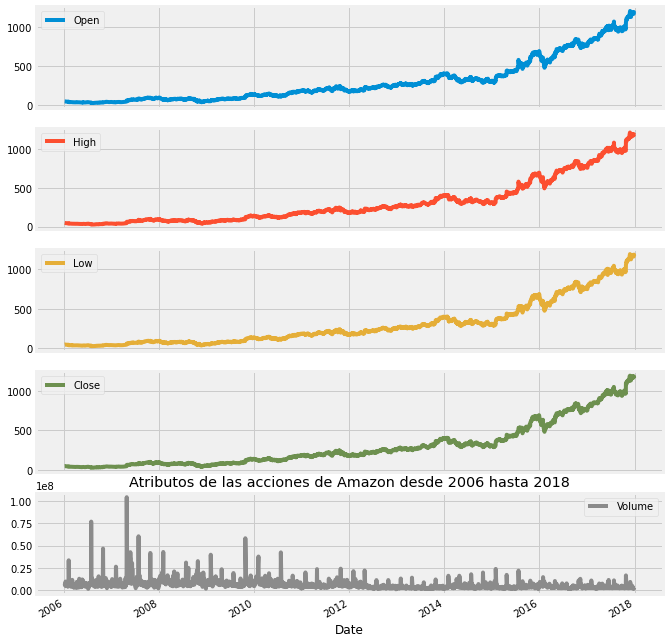

In [5]:
amazon['2006':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Atributos de las acciones de Amazon desde 2006 hasta 2018')
plt.show()

**Se puede visualizar la variación porcentual para analizar el rendimiento de las acciones.**

<AxesSubplot:xlabel='Date'>

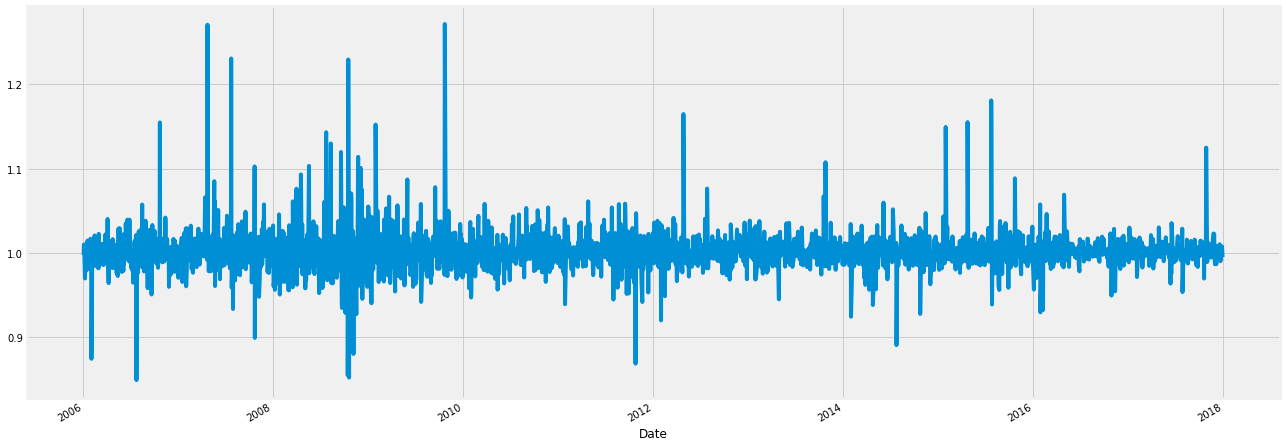

In [6]:
amazon['Change'] = amazon.High.div(amazon.High.shift())
amazon['Change'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

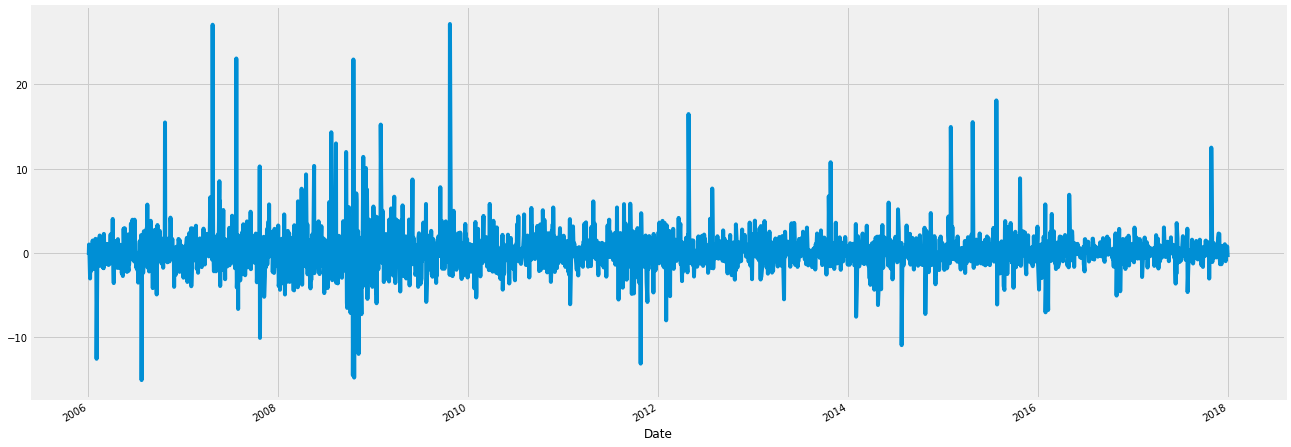

In [7]:
amazon['Return'] = amazon.Change.sub(1).mul(100)
amazon['Return'].plot(figsize=(20,8))

**Los tres componentes que serán fundamentales para la serie temporal son: tendencias, estacionalidad y ruido. Se definen de la siguiente manera:**
 - **Tendencia: Comportamiento o movimiento a largo plazo**
 - **Estacionalidad: Patrón periódico claro de una serie temporal**
 - **Ruido: Valores atípicos o ausentes**
 
**Existen múltiples algoritmos de descomposición que serán más o menos útiles dependiendo de las características de la serie.**

**El método clásico de descomposición es un procedimiento relativamente simple y constituye el punto de partida de la mayoría de los otros métodos de descomposición de series temporales. Hay dos formas de descomposición clásica: una descomposición aditiva y una descomposición multiplicativa. Estas se describen a continuación para una serie temporal con un período estacional m (por ejemplo, m=4 para los datos trimestrales, m=12 para los datos mensuales, m=7 para los datos diarios con un patrón semanal).**

**En la descomposición clásica, asumimos que el componente estacional es constante de año en año. Para la estacionalidad multiplicativa, los m valores que forman el componente estacional se denominan a veces “índices estacionales”.**

**Se descompone la serie de las acciones, en este caso, se visualizan las subidas del valor de las acciones de Amazon.**

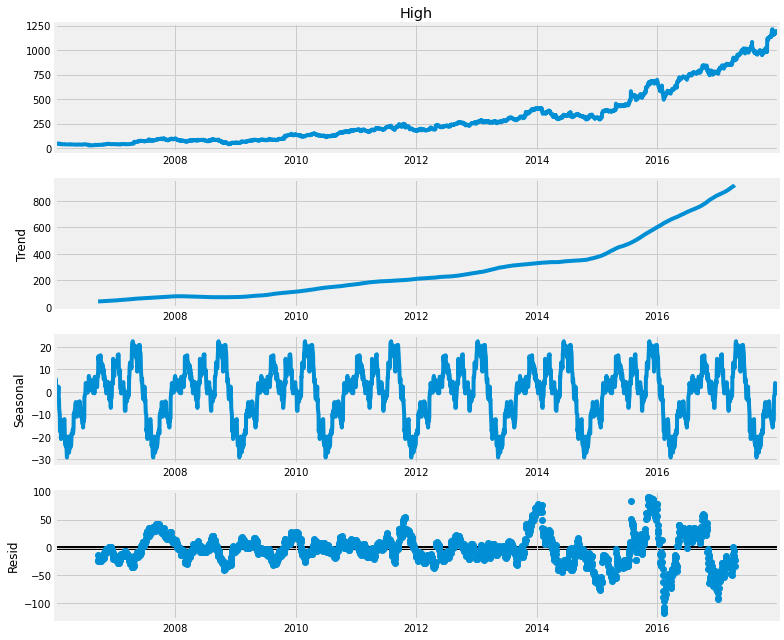

In [8]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],freq=360) 
figure = decomposed_amazon_volume.plot()
plt.show()

**En cuanto a la tendencia de las subidas del valor de las acciones de Amazon, es ascendente con el paso de los años aunque a partir de 2015 la pendiente es más pronunciada. Existe variación estacional con un patrón aparentemente claro y respecto a los residuos, no siguen uniformidad por lo que se podría concluir que existen valores atípicos o faltantes.**

In [9]:
adf = adfuller(amazon["Volume"])
print("p-value of amazon: {}".format(float(adf[1])))

p-value of amazon: 2.7273708415135917e-05


**Se realiza una prueba Dickey-Fuller aumentada (ADF) para comprobar la hipótesis nula de que existe una raíz unitaria en la serie. Se trata básicamente de la prueba de Dickey-Fuller con más cambios retardados en el lado derecho. Como el p-valor es inferior a 0,05, se rechaza la hipótesis nula y no se trata de un recorrido aleatorio.**

### 1.1 - MODELO ARIMA

**Los modelos ARIMA proporcionan otro enfoque para la previsión de series temporales, estos modelos tienen como objetivo describir las autocorrelaciones en los datos.**

**Una serie temporal estacionaria es aquella cuyas propiedades estadísticas, como la media, la varianza, la autocorrelación, etc., son constantes a lo largo del tiempo. Existen:** 

   - **Estacionariedad fuerte: es un proceso estocástico cuya distribución de probabilidad conjunta incondicional no cambia cuando se desplaza en el tiempo. En consecuencia, parámetros como la media y la varianza tampoco cambian con el tiempo.**
    
   - **Estacionariedad débil: es un proceso en el que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo.**

**La estacionariedad es importante, ya que las series no estacionarias que dependen del tiempo tienen demasiados parámetros que hay que tener en cuenta a la hora de modelizar las series temporales. El método diff() puede convertir fácilmente una serie no estacionaria en una serie estacionaria.**

**Intentaremos descomponer el componente estacional de la serie temporal descompuesta anterior.**

<AxesSubplot:xlabel='Date'>

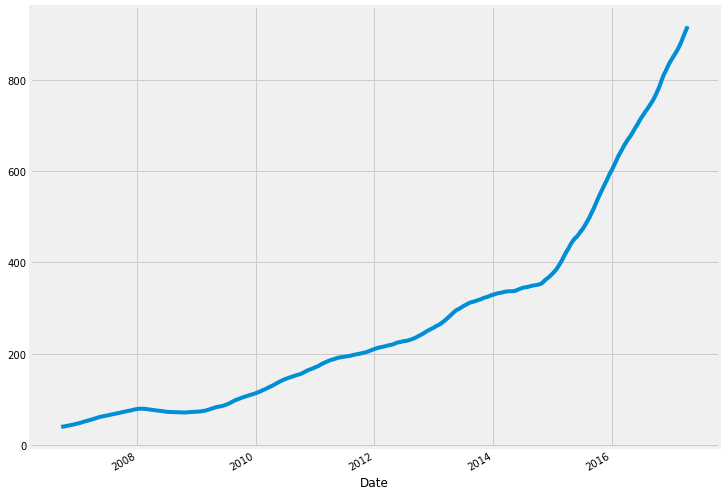

In [10]:
decomposed_amazon_volume.trend.plot()

<AxesSubplot:xlabel='Date'>

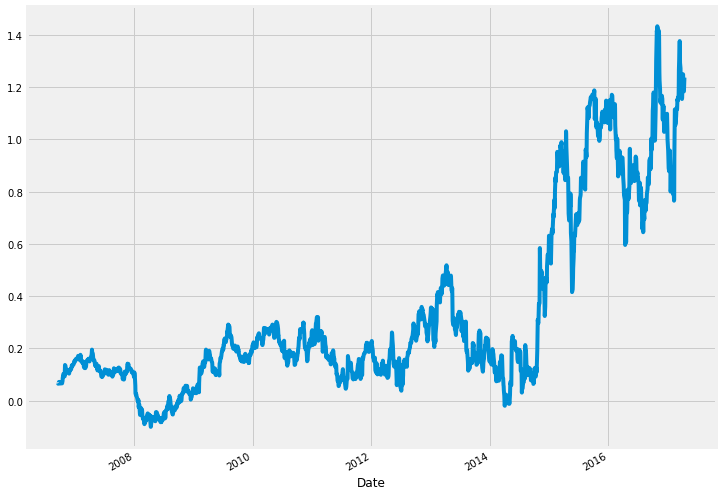

In [11]:
decomposed_amazon_volume.trend.diff().plot()

<AxesSubplot:xlabel='Date'>

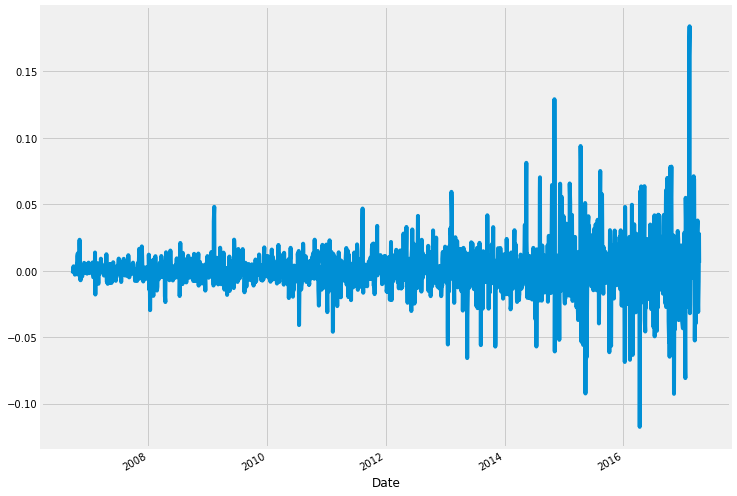

In [12]:
decomposed_amazon_volume.trend.diff().diff().plot()

**Se observa que tras la diferenciación la serie pierde la tendencia, siendo claramente estacionaria en media.**

**Ahora, se completa el conjunto de datos, para posteriormente utilizar las diferenciaciones que hemos realizado.**

In [13]:
df = pd.DataFrame(amazonNI)

In [14]:
df["Close_diff"] = df["Close"].diff()
df["Close_2_diff"] = df["Close_diff"].diff()
df["Date"] = pd.to_datetime(df["Date"], format = "%Y")
df.set_index("Date", inplace = True)
df.dropna(inplace = True, axis = "rows")
df.head()
y = df["Close"]
y_diff = df["Close_diff"]
y_2_diff = df["Close_2_diff"]

**Se separan la "x" y la "y" para el gráfico, así se visualizarán los datos anteriores a lo largo de los años.**

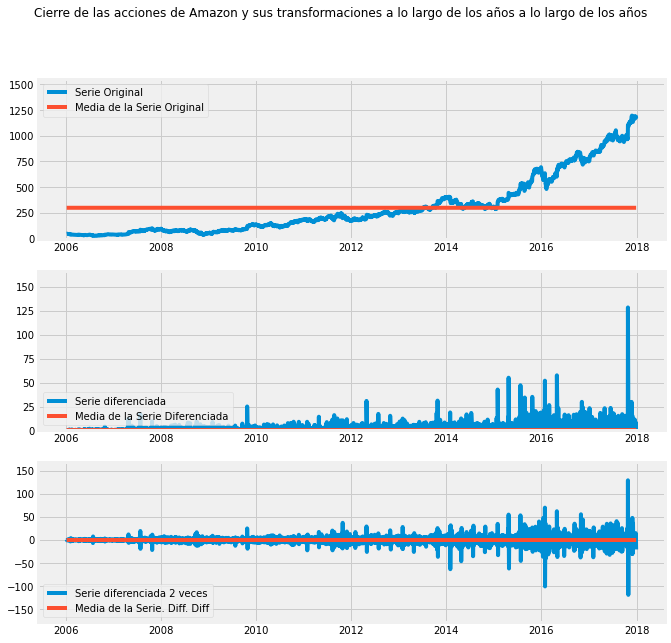

In [15]:
# separar x y la y para el gráfico
x = df.index
y_media = [np.mean(y) for _ in y]
y_diff_media = [np.mean(y_diff) for _ in y_diff]
y_2_diff_mean = [np.mean(y_2_diff) for _ in y_2_diff]

# visualización de los datos anteriores a los largo de los años
fig = plt.figure(figsize = (10, 10))
ax1, ax2, ax3 = fig.subplots(3, 1)

# la serie original parece ser no estacionaria
# si nos fijamos en su comportamiento, vemos muchos picos y que la media de diferentes
# tramos de la serie es diferente.
# además la covarianza entre diferentes tramos también parece distinta.
ax1.plot(x, y, label = "Serie Original")
ax1.plot(x, y_media, label = "Media de la Serie Original")
ax1.set_ylim(0, np.max(y)*1.3)
ax1.legend(loc = "upper left")

# Si transformamos la serie utilizando el logaritmo neperiano (ln)
# tenemos una serie que YA es estacionaria en media y que oscila entorno
# a 7.
ax2.plot(x, y_diff, label = "Serie diferenciada")
ax2.plot(x, y_diff_media, label = "Media de la Serie Diferenciada")
ax2.set_ylim(0, np.max(y_diff)*1.3)
ax2.legend(loc = "lower left")

# Si aplicamos una diferenciación a al serie logarítmica, seguimos teniendo
# una serie estacionaria, pero esta vez, la media de la serie oscila entorno al cero.

# La diferenciación de una serie estacionaria SIEMPRE da lugar a otra serie estacionaria.
# Por este motivo, no haría falta hacer la diferencia y con la serie transformada (logarítmica)
# es suficiente.

ax3.plot(x, y_2_diff, label = "Serie diferenciada 2 veces")
ax3.plot(x, y_2_diff_mean, label = "Media de la Serie. Diff. Diff")
ax3.set_ylim(np.min(y_2_diff)*1.5, np.max(y_2_diff)*1.3)
ax3.legend(loc = "lower left")

fig.suptitle("Cierre de las acciones de Amazon y sus transformaciones a lo largo de los años a lo largo de los años");

**Prestando atención a las gráficas, la serie original no es estacionaria porque, fijándonos en su comportamiento, se aprecian muchos picos y la media de diferentes tramos de la serie es diferente. Además, la covarianza entre diferentes tramos también parece distinta. Se transforma la serie aplicando diferenciación, siendo así una sería estacionaria en media que oscila en torno a 0. Si se aplica diferenciación a la serie ya diferenciada, la serie sigue siendo estacionaria ya que si se aplica diferenciación a una serie estacionaria, ésta lo seguirá siendo. Por ello, con esta primera diferenciación sería suficiente.**

In [16]:
for serie, nombre_serie in zip([y, y_diff, y_2_diff], ["Serie Original", "Serie diferenciada", "Serie. Diff. Diff"]):
    
    print("------------------------------------------------------------------")
    
    print("Trabajando con la serie {}\n".format(nombre_serie))
    resultado_analisis = adfuller(serie)
    
    valor_estadistico_adf = resultado_analisis[0]
    p_valor = resultado_analisis[1]
    
    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
    print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
    print("p-valor: {}\n".format(p_valor))

------------------------------------------------------------------
Trabajando con la serie Serie Original

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: 2.963863640142493

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 1.0

------------------------------------------------------------------
Trabajando con la serie Serie diferenciada

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -10.091680824769881

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 1.1178880015097393e-17

------------------------------------------------------------------
Trabajando con la serie Serie. Diff. Diff

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -16.2876586157668

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 3.3628716716397655e-29



**Normalmente no es posible decir, simplemente a partir de una gráfica temporal, qué valores de p y q son apropiados para crear el modelo. Sin embargo, es posible utilizar las gráfica de ACF y PACF, para determinar los valores apropiados para p y q.**

**Un gráfico de ACF muestra las autocorrelaciones que miden la relación entre el tiempo y el tiempo anterior para diferentes valores de k. Para superar este problema, podemos usar autocorrelaciones parciales. Estas miden la relación entre el tiempo a estudiar y el anterior después de eliminar los efectos de los retardos. A continuación, se muestran las gráficas de ACF y PACF para las acciones de Amazon.**

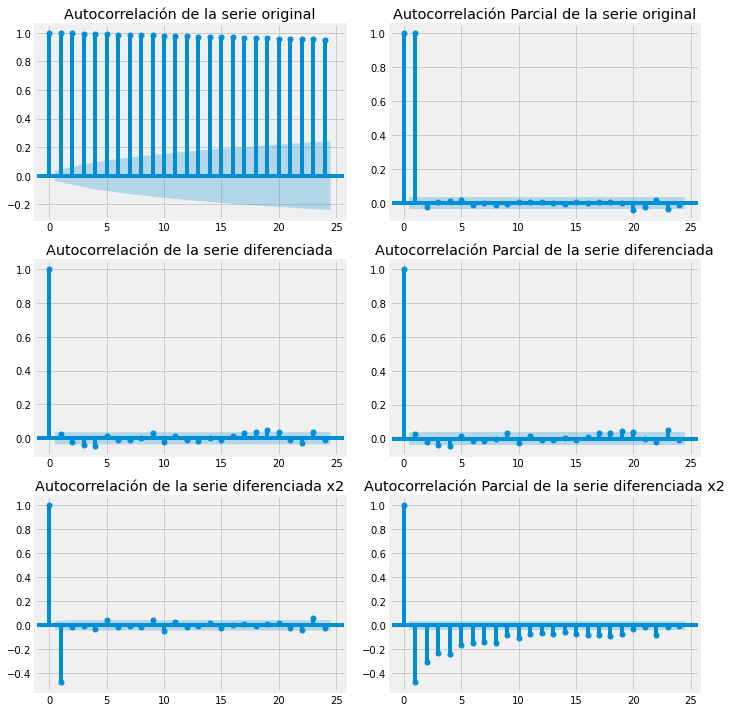

In [17]:
LAGS = 24

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6)) = fig.subplots(3, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación de la serie original")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial de la serie original")

plot_acf(y_diff, ax = ax3, lags = LAGS, title = "Autocorrelación de la serie diferenciada")
plot_pacf(y_diff, ax = ax4, lags = LAGS, title = "Autocorrelación Parcial de la serie diferenciada")

plot_acf(y_2_diff, ax = ax5, lags = LAGS, title = "Autocorrelación de la serie diferenciada x2")
plot_pacf(y_2_diff, ax = ax6, lags = LAGS, title = "Autocorrelación Parcial de la serie diferenciada x2")

fig.tight_layout()

**El valor p para el primer orden está mucho más cerca del umbral, por lo que, para ser conservadores, consideraremos la primera diferenciación y se comprobará cómo funciona el modelo.**

**El siguiente paso en el modelo ARIMA es calcular "p", o el orden del modelo autorregresivo. Podemos inspeccionar el gráfico de autocorrelación parcial, que mide la correlación entre los datos de la serie temporal y un determinado retardo. Basándonos en la presencia o ausencia de correlación, podemos determinar si el retardo o el orden son necesarios o no.**


**Si los datos proceden de un modelo ARIMA(p,d,0) o ARIMA(0,d,q), entonces las gráficas del ACF y el PACF son útiles para determinar el valor de p o q.**

**Vemos que hay todos los picos en el ACF son significativos. En el PACF, hay dos picos significativos. Se puede ignorar un pico significativo en cada gráfica si está justo fuera de los límites, y no en los primeros retardos. Después de todo, la probabilidad de que una pico sea significativo por casualidad es de una en veinte, y estamos trazando 22 picos en cada gráfico.** 

**En ambos gráficos, vemos que el primer retraso y el segundo son los más significativos. Por lo tanto, consideramos que "p" es 1, y también se probara con "p" igual a 2.**

**Por último, "q" puede estimarse de forma similar observando el gráfico ACF en lugar del gráfico PACF. Observando el número de rezagos que cruzan el umbral, podemos determinar qué parte del pasado sería lo suficientemente significativa como para considerarla para el futuro. Los que tienen una alta correlación contribuyen más y serían suficientes para predecir los valores futuros. A partir de los gráficos anteriores, el parámetro de la media móvil (MA) puede fijarse en 2.**

**Así, los mejores modelos ARIMA aparentemente y aplicando los criterios según los gráficos ACF y PACF serían  ARIMA(p=1, d=1,q=2) 
ó ARIMA(p=2, d=1,q=2).**

**Se crea una función para buscar los mejores parámetros para ajustar nuestros datos y comprobar que el análisis hecho concuerda con la propuesta de parámetros de la función automática de búsqueda.**

**Se dividirán los datos en train y test para entrenar y posteriormente, validar. Se trabajará con la serie diferenciada por lo que se probará la bondad de los modelos ARIMA(1,0,2) ó ARIMA(2,0,2).**

In [18]:
serie_a_predecir = y_diff

y_index = serie_a_predecir.index

date_train = int(len(y_index)*0.9)

y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]

In [19]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 0)]

In [20]:
st = time.time()

best_score = 0
best_params2 = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros ha llevado {} minutos!".format((et - st)/60))

/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:17160.161369109814
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:17156.771446411607
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:17153.364982607472


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:19021.646515910055
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:17149.82771192456


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:17146.51379701731
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:21984.268118002863


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:19018.427312323263


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informatio

ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:17155.231681784313
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:17162.095836316606


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:17158.973574803655
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:17154.317858849172
ARIMA(1, 1, 0)x(0, 0, 0, 0)12 - AIC:18261.255555497202


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:17151.82647247307


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:17148.349909603163
ARIMA(1, 2, 0)x(0, 0, 0, 0)12 - AIC:20379.754662182386


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:18259.00816345131


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:17399.68327146282
ARIMA(2, 0, 0)x(0, 0, 0, 0)12 - AIC:17158.701508466696


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(2, 0, 1)x(0, 0, 0, 0)12 - AIC:17160.224652658817


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(2, 0, 2)x(0, 0, 0, 0)12 - AIC:17120.89186868485
ARIMA(2, 1, 0)x(0, 0, 0, 0)12 - AIC:17979.516371155318


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(2, 1, 1)x(0, 0, 0, 0)12 - AIC:17153.760401267187


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(2, 1, 2)x(0, 0, 0, 0)12 - AIC:17150.16955603005
ARIMA(2, 2, 0)x(0, 0, 0, 0)12 - AIC:19639.296140098784


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has 

ARIMA(2, 2, 1)x(0, 0, 0, 0)12 - AIC:17983.79135965968


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(2, 2, 2)x(0, 0, 0, 0)12 - AIC:17166.778852120413
La búsqueda de parámetros ha llevado 0.23037449518839517 minutos!


In [21]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (2, 0, 2), 
Con un AIC de 17120.89186868485


In [22]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = best_params,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [23]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4792      0.004    344.280      0.000       1.471       1.488
ar.L2         -0.9903      0.004   -254.720      0.000      -0.998      -0.983
ma.L1         -1.4833      0.007   -225.930      0.000      -1.496      -1.470
ma.L2          0.9811      0.006    163.704      0.000       0.969       0.993
sigma2        32.0841      0.272    117.784      0.000      31.550      32.618


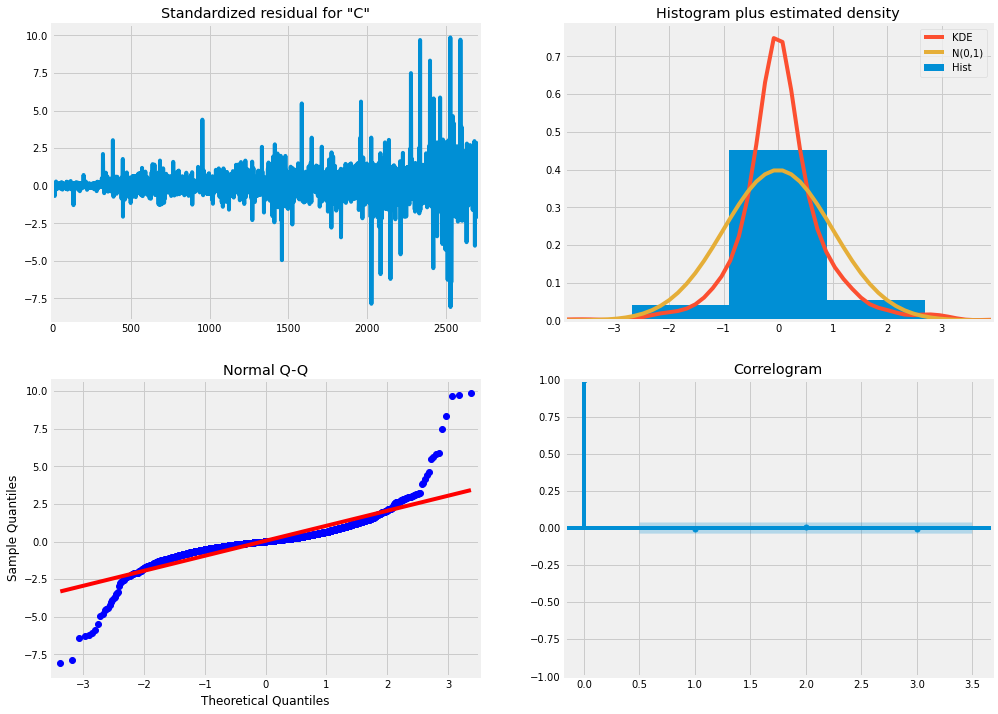

In [24]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

**Interprentado los gráficos podemos observar lo siguiente:**

**En la primera gráfica de los residuos, el modelo parece que sigue un proceso de ruido blanco y no es predecible. Esto implica que el modelo ha extraído toda la información de los datos. En el histograma se aprecia que la distribución de los residuos es aproximadamente una distribución Normal (0,1). Por otro lado, en cuanto a la distribución ordenada de los residuos, se quiere parecer a una normal, pero las colas distan mucho de ello. Y por último, en la gráfica de autocorrelación parcial entre los resiudos y los residuos del momento anterior dan lugar a valores no significativos. Esto implica que aún queda información por extraer, es decir, el modelo no ha sido capaz de reproducir al completo el patrón de comportamiento sistemático de la serie.**

**Ahora, con el conjunto de test que habíamos separado con anterioridad, se pueden realizar predicciones. Para ello, es suficiente con especificar el número de pasos futuros que se quieren estimar y además calcular el intervalo de confianza de la predicción.**

In [25]:
# Número de steps/pasos futuros a estimar
pred_uc = results.get_forecast(steps = len(y_test))

# Intervalo de confianza de la predicción
pred_ci = pred_uc.conf_int()


/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [26]:
y_pred = pred_ci.iloc[:, 0]

**Para analizar cuán diferente es un conjunto de valores, se calcula el error cuadrático medio. Cuanto más pequeño es el valor RMSE, más cercanos son los valores predichos y observados.**

In [27]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("El modelo ARIMA con los parametros {}, ha dado un rmse en TEST de {}".format(best_params, round(rmse, 2)))

El modelo ARIMA con los parametros (2, 0, 2), ha dado un rmse en TEST de 17.84


### 1.2 - MODELO SARIMAX

**Un modelo SARIMA se forma incluyendo términos estacionales adicionales en el modelo ARIMA.**

In [31]:
import statsmodels.api as sm
import pmdarima as pm 

**Se comienza con un modelo ARIMA(0,1,0)(0,1,0,12), que indica una primera diferencia estacional, y componentes MA(1) no estacionales y estacionales. Mediante la función autoarima se comprobará cual es la mejor combinación de parámetros para minimizar el AIC.**

In [32]:
model = pm.auto_arima(df["Close"], d=1, D=1, seasonal=True, m=12, trend='c',
                     start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=22155.059, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21286.800, Time=1.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=22155.300, Time=0.28 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20887.697, Time=2.86 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20887.362, Time=2.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=21285.612, Time=0.93 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=20887.643, Time=3.42 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=14.64 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=20887.362, Time=2.19 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]   

**Como se trabaja con la serie ya diferenciada, se establecerá el parámetro d al valor 0. En el siguiente paso se crea el modelo.**

In [33]:
param=(0,0,0)
param_seasonal=(2,1,0,12)
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = param,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


**Analizando los resultados, vemos que se obtienen unos gráficos similares a los del modelo ARIMA, por lo que, se extraen las mismas conclusiones.**

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7177      0.009    -77.116      0.000      -0.736      -0.699
ar.S.L24      -0.3550      0.009    -37.774      0.000      -0.373      -0.337
sigma2        43.1363      0.433     99.662      0.000      42.288      43.985


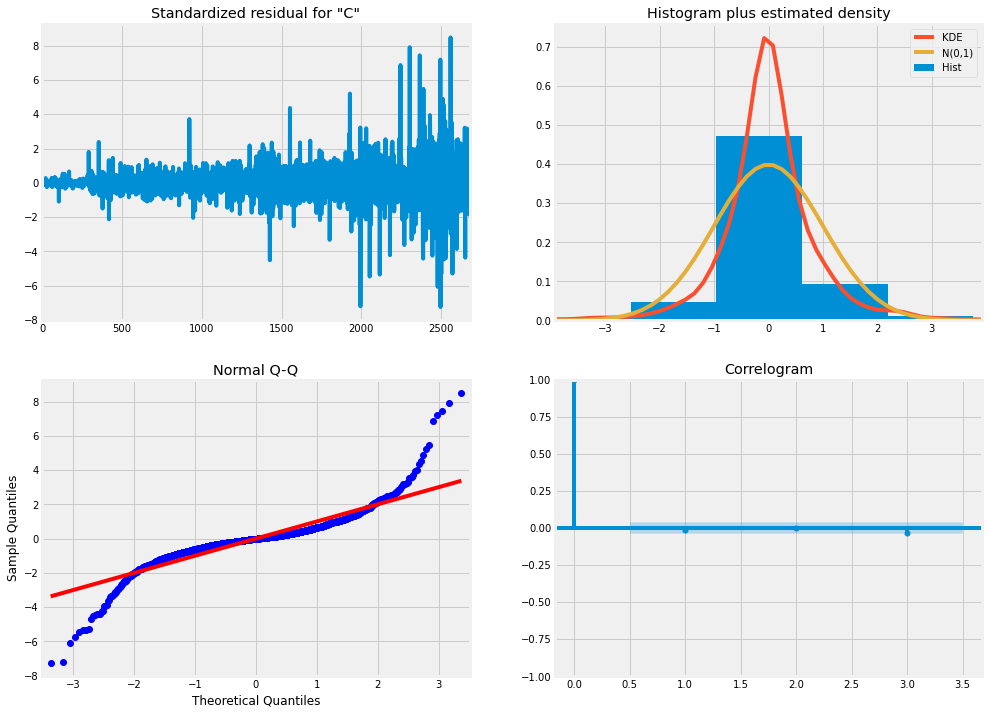

In [34]:
resultsX = mod.fit()
print(resultsX.summary().tables[1])
resultsX.plot_diagnostics(figsize = (15, 12), lags = 3);

In [35]:
pred = resultsX.predict(start=450, end=516)
print(results.summary())
print(pred.describe())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2715
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -8555.446
Date:                Fri, 01 Jul 2022   AIC                          17120.892
Time:                        00:20:50   BIC                          17150.419
Sample:                             0   HQIC                         17131.567
                               - 2715                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4792      0.004    344.280      0.000       1.471       1.488
ar.L2         -0.9903      0.004   -254.720      0.000      -0.998      -0.983
ma.L1         -1.4833      0.007   -225.930      0.0

In [36]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = resultsX.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

/home/amanda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [37]:
y_pred = pred_ci.iloc[:, 0]
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("El modelo SARIMAX con los parametros {}x{} , ha dado un rmse en test de {}".format(param, param_seasonal, round(rmse, 2)))

El modelo SARIMAX con los parametros (0, 0, 0)x(2, 1, 0, 12) , ha dado un rmse en test de 28.3


--------------------------------------------

### 3- EXPLICABILIDAD

**Cuando realizamos un modelo de machine learning, se suele tener la tendencia de que tanto los resultados como el proceso solamente lo entiende un grupo pequeño de personas y tiene poca interpretabilidad para organizaciones que basan sus decisiones en este tipo de implementaciones. Los usuarios que finalmente usan estos modelos también les ayuda una explicación de cómo el modelo realizó la predicción y que valores tomó en consideración en mayor o menor medida.**

**Se van a utilizar los datos de FIFA para explicar este apartado.**

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.metrics import mean_squared_log_error, accuracy_score

data = pd.read_csv('fifa.csv')

In [43]:
data.head(10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


**Se crea la variable a predecir, en este caso, si un jugador será o no el mejor del partido en base a diferentes estadísticas calculadas y se separan los datos en entrenamiento y validación.**

In [47]:
y = (data['Man of the Match'] == "Yes")
nombre_caract = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[nombre_caract]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Se construye un modelo básico de Xgboost que utilizaremos después en los distintos paquetes. Se realizarán las predicciones y se comprobará el accuracy del modelo.**

In [48]:
#Construcción del modelo
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_mod=xgb.XGBClassifier(random_state=42,gpu_id=0) 
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel()) 

#Predicciones
y_pred = xgb_mod.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[00:22:30] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
Accuracy: 65.38%


**Ahora, se empieza el análisis con el que se hará transparente y explicable nuestro modelo.**

###  3.1 SHAP

**SHAP es uno de los enfoques más populares hoy en día. Está basado en la teoría de juegos y trata de explicar el resultado de un modelo de Machine Learning. Ayuda a conocer la magnitud del impacto y la dirección en que se mueven las diferentes variables.**

In [59]:
import shap

In [42]:
shap.initjs()

In [49]:
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

**Ahora que tenemos el modelo entrenado y hemos cargado las explicaciones del modelo en las variables explainer y shap_values, podemos empezar a utilizar las visualizaciones de la librería shap. Es importante notar que anteriormente cargamos shap.initjs() para mostrar las visualizaciones en el notebook.**

In [50]:
shap.force_plot(explainer.expected_value, shap_values, X)

**En el gráfico de arriba se muestran las predicciones para todo el dataset. Para cada fila de X se ve la visualización del peso de las características en el eje Y. Se puede ver que el valor de base está en la mitad del eje Y, y cuando el color rojo predomina por sobre el color azul, es que la predicción es mayor que este valor, mientras que lo contrario ocurre cuando el color azul predomina sobre el color rojo. Cabe destacar que esta visualización es interactiva en el notebook, donde se puede cambiar tanto lo que se ve en la parte alta de la imagen (sample order by similarity) como en la parte izquierda (f(x)).**

In [51]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

**En el gráfico anterior, se aprecian muchos valores. El valor base es el que utiliza el modelo para trabajar. La función sobre x es la predicción del modelo para nuestro conjunto de datos con las características analizadas. Los parámetros que están en rojo son los que hacen que la predicción tenga un valor más alto, mientras que los parámetros en azul hacen que la predicción tenga un valor más bajo.**

**Se puede ver claramente en la imagen que la variable GOAL SCORED tiene un efecto negativo elevado, el cual hace que la predicción baje su valor con respecto al valor de base. También podemos ver que variables como DISTANCE COVERED tienen un efecto positivo, que hace que la predicción tenga un valor más alto. Sin embargo, los valores en azul tienen un mayor peso en este caso que los valores en rojo, por eso es que el valor f(x) es menor al valor base del modelo.**

**Si queremos ver la relación de todas las variables con el modelo, y el impacto que éstas tienen, entonces podemos utilizar el Summary Plot. Con este gráfico vemos el valor SHAP de cada característica en el conjunto de entrenamiento.**

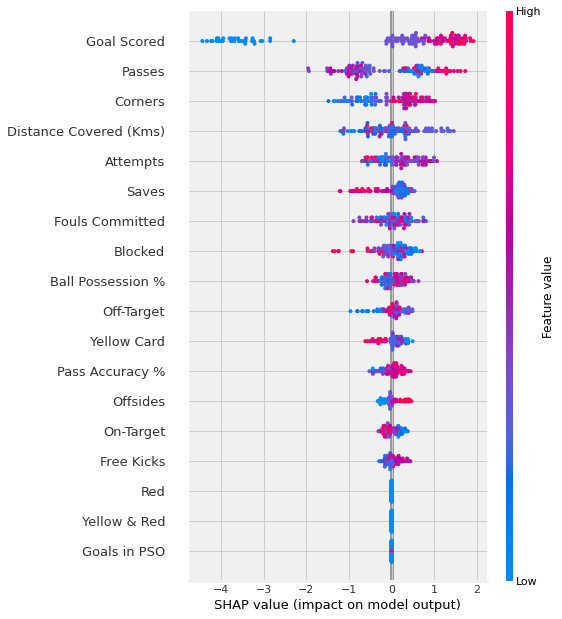

In [52]:
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

**La importancia de las variables están de mayor a menor, donde la variable GOAL SCORED y la variable PASSES son las más relevantes para el modelo, mientras que las variables YELLOW&RED y GOALS IN PSO son las que menos importancia tienen. Los parámetros que están en rojo son los que hacen que la predicción tenga un valor más alto, mientras que los parámetros en azul hacen que la predicción tenga un valor más bajo.**

**Otra manera de ver la importancia de las variables con Summary Plot es la siguiente:**

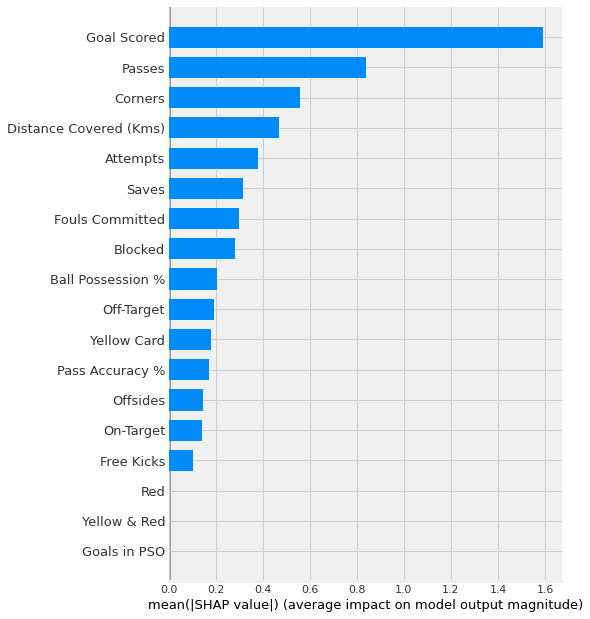

In [53]:
shap.summary_plot(shap_values, X, plot_type='bar')

**Aquí se aprecia en un gráfico de barras la importancia de las variables ordenadas de mayor a menor.**

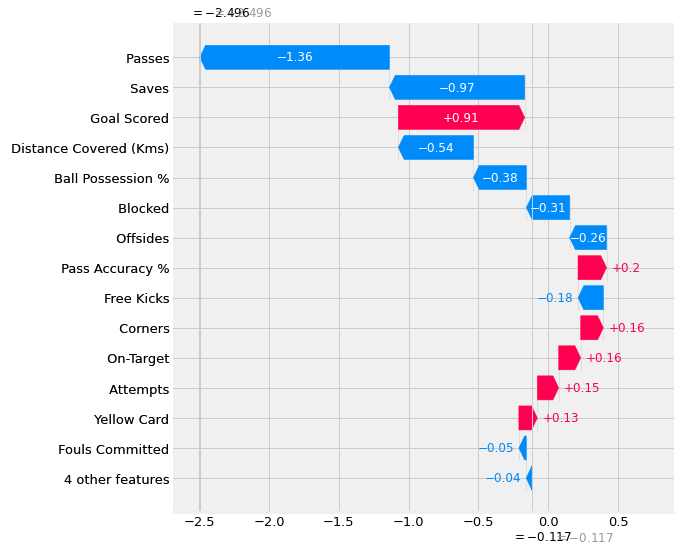

In [54]:
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

**Para ver la relación de un solo parámetro de entrada con respecto a las predicciones del modelo, podemos usar Dependence Plot. Este gráfico mostrará la variable llamada con la que más se relaciona a la hora de la predicción.**

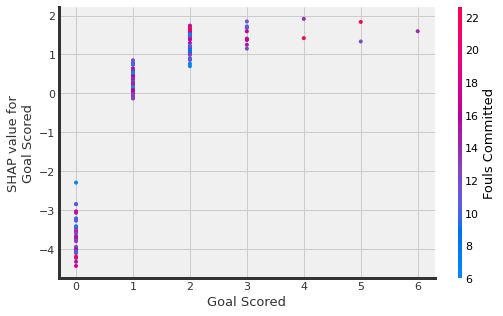

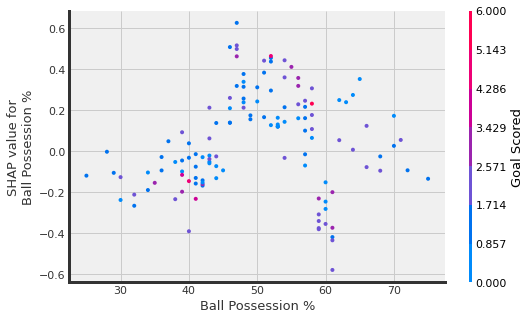

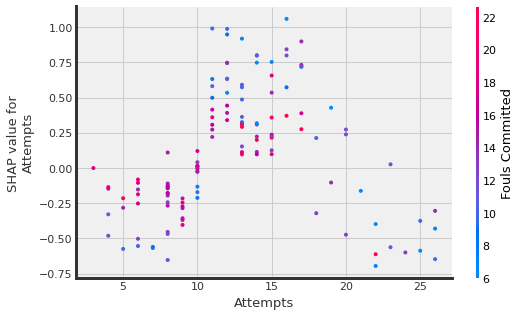

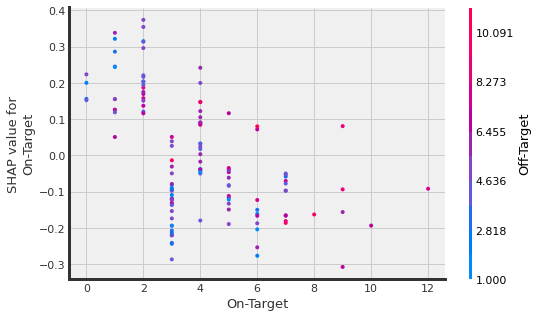

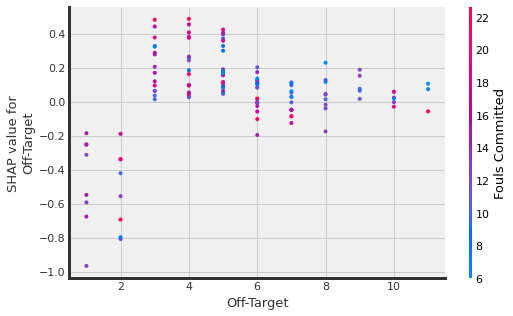

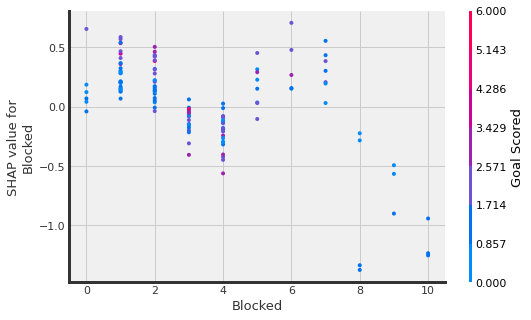

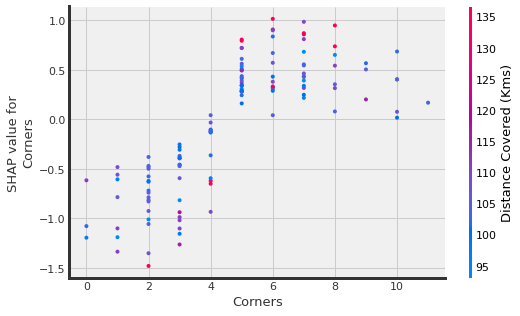

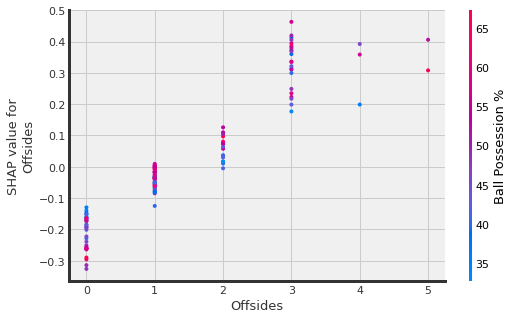

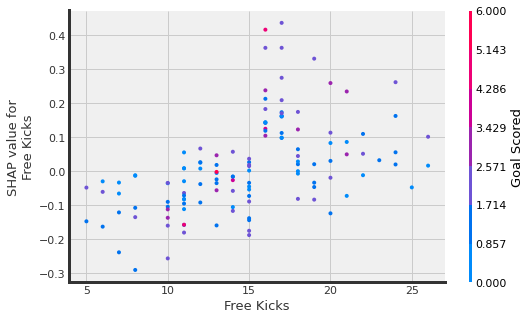

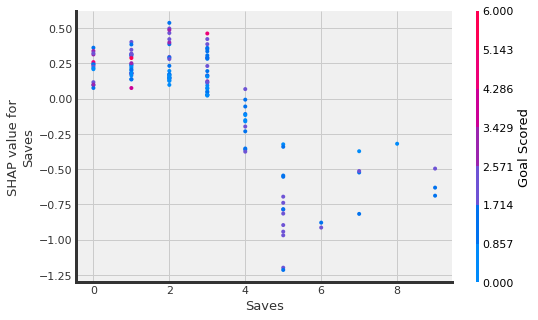

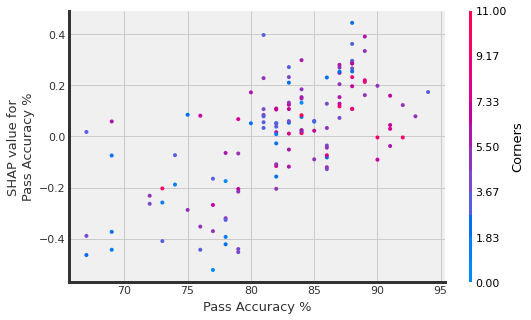

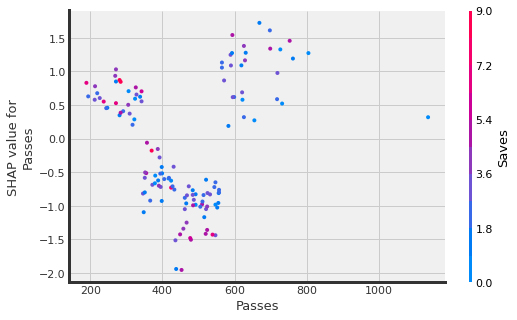

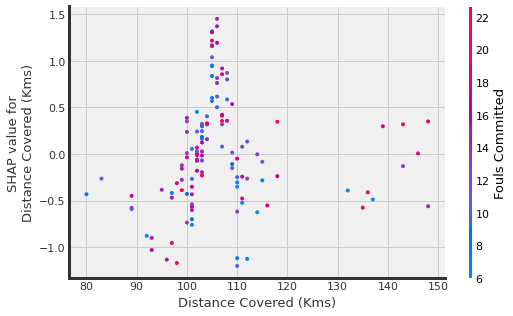

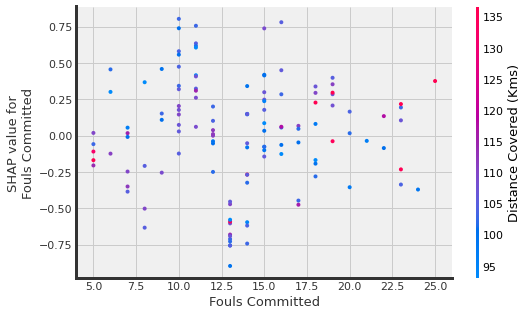

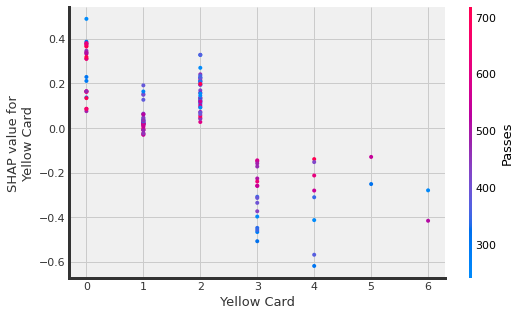

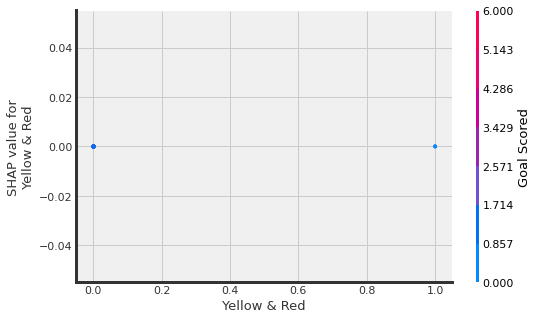

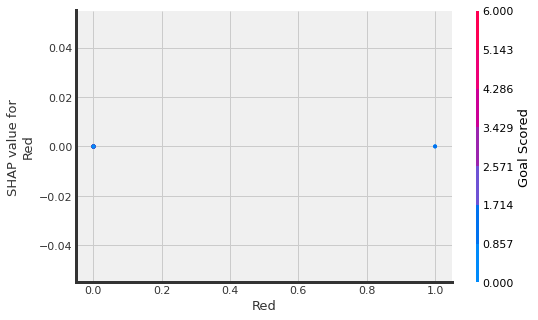

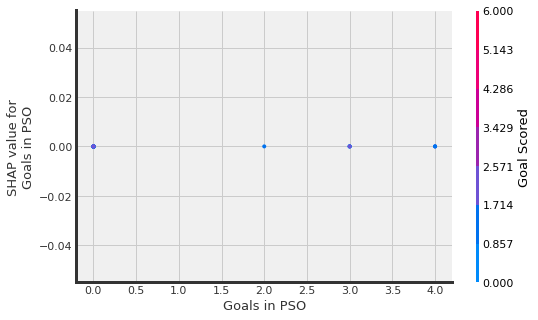

ValueError: Could not find feature named: worst concave points

In [55]:
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

### 3.2- PERMUTACIÓN DE CARACTERÍSTICAS

**Otra forma de evaluar la importancia de las variables en el modelo es la permutación de características.**

**La importancia de la permutación se calcula una vez que el modelo ha sido entrenado en el conjunto de entrenamiento. La precisión del modelo se ve más afectada cuando se reordena una característica importante de la que el modelo dependía bastante.** 



In [56]:
from sklearn.inspection import permutation_importance
import seaborn as sns
import xgboost

In [57]:
reg = xgboost.XGBRegressor().fit(X_train, y_train)

In [58]:
def _calc_feature_permutation_score(estimator, X, y, col_idx, n_repeats, scorer):
    X_permuted = X.copy()
    scores = np.zeros(n_repeats)
    shuffling_idx = np.arange(X.shape[0])
    
    for n_round in range(n_repeats):
        np.random.shuffle(shuffling_idx)
        col = X_permuted.iloc[shuffling_idx, col_idx]
        col.index = X_permuted.index
        X_permuted.iloc[:, col_idx] = col

        y_hat = estimator.predict(X_permuted)
        scores[n_round] = scorer(y, y_hat)

    return scores


def feature_permutation_score_matrix(estimator, X, y, n_repeats, scorer):
    feat_imp_vals = np.zeros((X.shape[1], n_repeats))
    
    for col_idx in range(feat_imp_vals.shape[0]):
        feat_imp_vals[col_idx, :] = _calc_feature_permutation_score(estimator, X, y, col_idx, n_repeats, scorer)
        
    
    if hasattr(X, 'columns'):
        columns = X.columns
    else:
        columns = list(range(feat_imp_vals.shape[0]))
    
    return pd.DataFrame(data=feat_imp_vals.T, columns=columns)

In [59]:
feat_imps = feature_permutation_score_matrix(xgb_mod, X_train, y_train, 100, mean_squared_log_error)

**La medida de importancia automáticamente tiene en cuenta todas las interacciones con otras características. Al permutar la función, también destruye los efectos de interacción con otras características. Esto significa que la importancia de la característica de permutación tiene en cuenta tanto el efecto de la característica principal como los efectos de interacción en el rendimiento del modelo.**

<AxesSubplot:xlabel='variable', ylabel='value'>

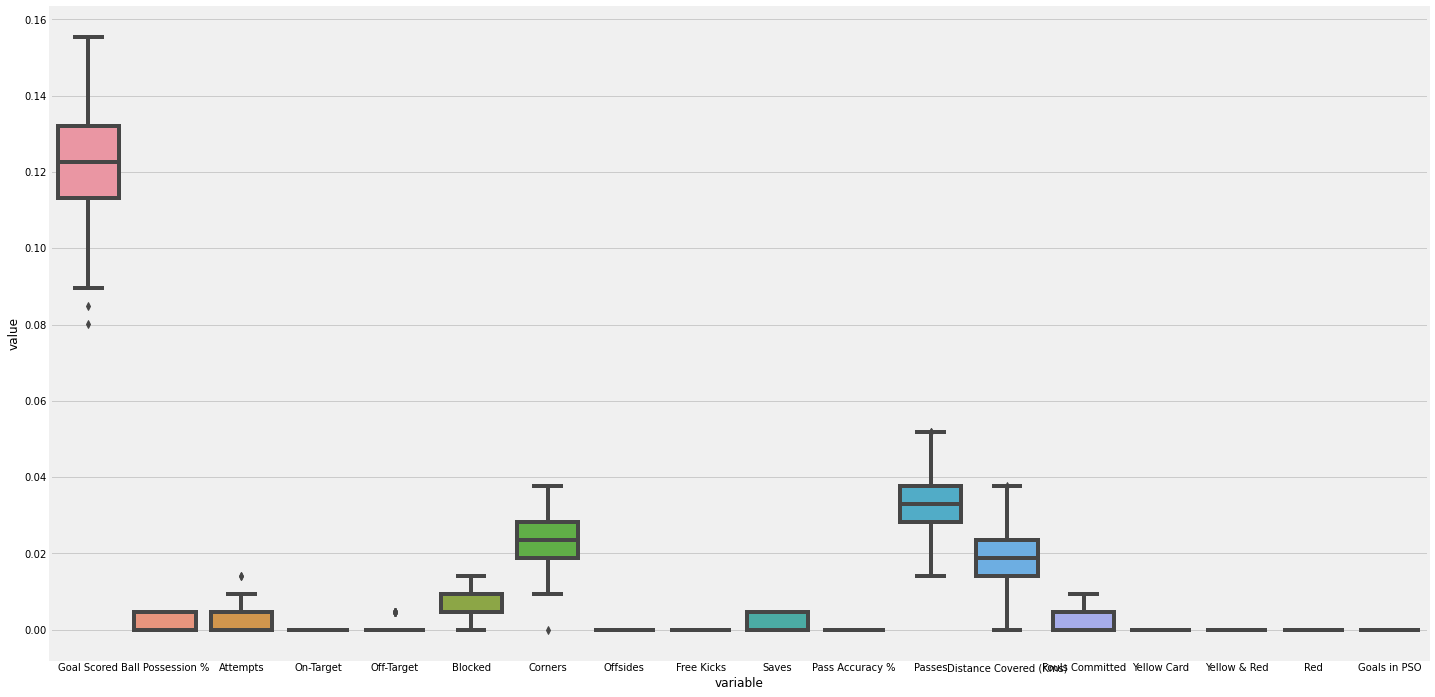

In [60]:
fig, ax = plt.subplots(figsize = (22, 12))
sns.boxplot(x="variable", y="value", data=pd.melt(feat_imps), ax=ax)

**Los valores de la parte superior del gráfico son las características más importantes de nuestro modelo, mientras que los de la parte inferior son los menos importantes.**

**En nuestro ejemplo, las tres características más importantes son GOAL SCORED, PASSES y CORNERS.**

In [61]:
permutation_importance(xgb_mod, X_train, y_train, n_repeats=100, scoring='neg_mean_squared_log_error')

{'importances_mean': array([0.12301977, 0.00216675, 0.00419311, 0.        , 0.00080125,
        0.00687745, 0.02157718, 0.        , 0.        , 0.00381536,
        0.        , 0.03222637, 0.01686694, 0.00301461, 0.        ,
        0.        , 0.        , 0.        ]),
 'importances_std': array([0.0145215 , 0.00234761, 0.00364313, 0.        , 0.00177044,
        0.00355164, 0.00666874, 0.        , 0.        , 0.00184786,
        0.        , 0.01005454, 0.00835394, 0.00329857, 0.        ,
        0.        , 0.        , 0.        ]),
 'importances': array([[0.11308238, 0.12250014, 0.13192655, ..., 0.13192079, 0.12250302,
         0.10365308],
        [0.00471032, 0.00471032, 0.        , ..., 0.        , 0.        ,
         0.00471032],
        [0.00471032, 0.00942353, 0.00471032, ..., 0.00471032, 0.00471032,
         0.00471032],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ...,

### 3.3- EXPLAINING BOOSTING CLASSIFIER

**La máquina de refuerzo explicable (EBM) es un modelo aditivo generalizado de refuerzo cíclico basado en árboles con detección automática de interacciones. Las EBM suelen ser tan precisas como los modelos más avanzados, pero son completamente interpretables. Aunque los EBM suelen ser más lentos de entrenar que otros algoritmos modernos, son extremadamente compactos y rápidos a la hora de predecir.**

**Se construye un nuevo modelo y se cargan los paquetes necesarios.**

In [64]:
import pandas as pd
from interpret.perf import ROC
from interpret import show
import numpy as np
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['Goal Scored', 'Ball Possession %',
                                             'Attempts', 'On-Target',
                                             'Off-Target', 'Blocked', 'Corners',
                                             'Offsides', 'Free Kicks', 'Saves',
                                             'Pass Accuracy %', 'Passes',
                                             'Distance Covered (Kms)',
                                             'Fouls Committed', 'Yellow Card',
                                             'Yellow & Red', 'Red',
                                             'Goals in PSO',
                                             'Goal Scored x Corners',
                                             'Goal Scored x Ball Possession %',
                                             'Goal Scored x Fouls Committed'...
                                             'continuous', 'continuous',
                                

**Se generan explicaciones tanto globales como locales.**

In [65]:
#Explicaciones globales
global_exp=ebm.explain_global()
show(global_exp)

<!-- http://127.0.0.1:7001/140282996197696/ -->

In [66]:
#Explicaciones locales
ebm_local = ebm.explain_local(X, y)
show(ebm_local)

<!-- http://127.0.0.1:7001/140282479410336/ -->

**Ahora, se realiza una visualización del análisis exploratorio:**

In [67]:
import interpret
from interpret import glassbox, blackbox, greybox
from interpret import data
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

<!-- http://127.0.0.1:7001/140283392157104/ -->

**Aquí, lo vemos en una única ventana:**

In [68]:
show([hist, ebm_local,global_exp], share_tables=True)

<!-- http://127.0.0.1:7001/140282478064192/ -->
 Open in new window